In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
column_names_data = ['user_id', 'item_id', 'rating', 'timestamp']
df_data = pd.read_csv('u.data', sep='\t', names=column_names_data)
df_data.drop('timestamp',axis=1, inplace=True)

In [3]:
column_names_item = [ 'item_id' , 'release date' ,'unknown' , 'Action' , 'Adventure' , 'Animation' ,
                      'Children' , 'Comedy' , 'Crime' , 'Documentary' , 'Drama' , 'Fantasy' ,
                      'Film-Noir' , 'Horror' , 'Musical' , 'Mystery' , 'Romance' , 'Sci-Fi' ,
                      'Thriller' , 'War' , 'Western']
df_item = pd.read_csv('u_item.csv', names=column_names_item)
df_item['release date'] = pd.to_datetime(df_item['release date'])

In [4]:
column_names_user = ['user_id', 'age', 'gender', 'occupation', 'zip code']
df_user = pd.read_csv('u.user', sep='|', names=column_names_user)
df_user.drop('zip code', axis=1, inplace=True)

In [5]:
df_user.head()

,user_id,age,gender,occupation
0,1,24,M,technician
1,2,53,F,other
2,3,23,M,writer
3,4,24,M,technician
4,5,33,F,other


In [6]:
df_data.head()

,user_id,item_id,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3


In [7]:
df_item.drop('unknown', axis=1,inplace=True)

In [8]:
genere = ['Action', 'Adventure',
       'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western']

In [9]:
G = {}
for i in genere:
    temp = pd.DataFrame(data=df_item[df_item[i]==1])
    G[i] = temp['item_id'].values

In [10]:
# return frequecy map of genere based on clustered user
def frequency_map(df):
    freq_map = {}
    for i in genere:
        freq_map[i] = 0
    for i in df['item_id']:
        for j in genere:
            if i in G[j]:
                freq_map[j] += 1
    return freq_map

In [11]:
ip_genere = input("Enter the genere of your choice: ")

Enter the genere of your choice: Horror


In [12]:
print("Total movies in selected genere -",G[ip_genere].shape[0])

Total movies in selected genere - 92


In [13]:
filtered_df = pd.DataFrame(df_data[df_data['item_id']==G[ip_genere][0]])
for i in G[ip_genere][1:]:
    temp = pd.DataFrame(df_data[df_data['item_id']==i])
    filtered_df = filtered_df.append(temp)

In [14]:
filtered_df.head()

,user_id,item_id,rating
442,5,17,4
630,244,17,2
1616,267,17,4
1783,1,17,3
2346,49,17,2


In [15]:
X = df_user.iloc[:].values

In [16]:
# encoding gender
from sklearn.preprocessing import LabelEncoder
labelencoder_gender = LabelEncoder()
X[:,2] = labelencoder_gender.fit_transform(X[:, 2])

In [17]:
df_user['gender'] = X[:,2]

In [18]:
df_user.drop('occupation', axis=1, inplace=True)
df_user.head()

,user_id,age,gender
0,1,24,1
1,2,53,0
2,3,23,1
3,4,24,1
4,5,33,0


In [19]:
df_user.head(10)

,user_id,age,gender
0,1,24,1
1,2,53,0
2,3,23,1
3,4,24,1
4,5,33,0
5,6,42,1
6,7,57,1
7,8,36,1
8,9,29,1
9,10,53,1


In [20]:
fdf = pd.merge(filtered_df,df_user,on='user_id')

In [21]:
fdf

,user_id,item_id,rating,age,gender
0,5,17,4,33,0
1,5,101,5,33,0
2,5,183,4,33,0
3,5,185,3,33,0
4,5,200,2,33,0
5,5,208,4,33,0
6,5,219,3,33,0
7,5,234,2,33,0
8,5,379,3,33,0
9,5,396,5,33,0


In [22]:
fdf.shape

(5317, 5)

In [23]:
fidf = pd.DataFrame(df_item[df_item['item_id']==G[ip_genere][0]])
for i in G[ip_genere][1:]:
    temp = pd.DataFrame(df_item[df_item['item_id']==i])
    fidf = fidf.append(temp)

In [24]:
from sklearn.cluster import KMeans

In [25]:
def WCSS(X):
    wcss = []
    for i in range(1,10):
        tclassifier = KMeans(n_clusters=i, init='k-means++', random_state=0)
        tclassifier.fit(X)
        wcss.append(tclassifier.inertia_)
    plt.plot(range(1, 10), wcss)
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

In [26]:
# Visualising the clusters
def visualize(X):
    plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
    plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
    plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
    plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
    plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'yellow', label = 'Centroids')
    plt.title('Clusters of users')
    plt.xlabel('rating')
    plt.ylabel('age')
#     plt.legend()
    plt.show()

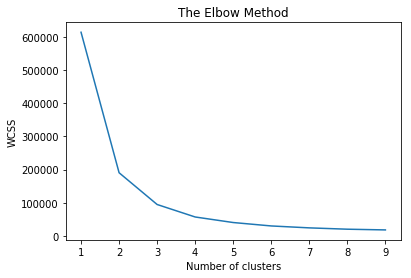

In [27]:
WCSS(fdf.iloc[:,2:-1].values)

In [28]:
kmeans = KMeans(n_clusters=4)
y_kmeans = kmeans.fit_predict(fdf.iloc[:,2:-1])

In [29]:
c1_users = []
c2_users = []
c3_users = []
c4_users = []

for i in range(len(y_kmeans)):
    if y_kmeans[i] == 0:
        c1_users.append((fdf['user_id'][i],fdf['item_id'][i],fdf['rating'][i]))
    elif y_kmeans[i] == 1:
        c2_users.append((fdf['user_id'][i],fdf['item_id'][i],fdf['rating'][i]))
    elif y_kmeans[i] == 2:
        c3_users.append((fdf['user_id'][i],fdf['item_id'][i],fdf['rating'][i]))
    else:
        c4_users.append((fdf['user_id'][i],fdf['item_id'][i],fdf['rating'][i]))

In [30]:
print(len(c1_users))
print(len(c2_users))
print(len(c3_users))
print(len(c4_users))

1622
1064
1959
672


In [31]:
# create user item matrix from selected cluster
# apply SVD to generate recommendations

In [32]:
c1_df = pd.DataFrame(c1_users, columns=["user_id", "item_id", "rating"])

In [33]:
c1_df.head()

,user_id,item_id,rating
0,267,17,4
1,267,183,4
2,267,217,4
3,267,559,3
4,267,665,4


In [34]:
c1_df.shape

(1622, 3)

In [35]:
n_users = c1_df.user_id.nunique()
n_items = c1_df.item_id.nunique()

print('Num. of Users: '+ str(n_users))
print('Num of Movies: '+str(n_items))

Num. of Users: 215
Num of Movies: 90


In [36]:
from sklearn import preprocessing
le_user = preprocessing.LabelEncoder()
le_user.fit(c1_df['user_id'].values)
le_item = preprocessing.LabelEncoder()
le_item.fit(c1_df['item_id'].values)

LabelEncoder()

In [37]:
enc_user_id = le_user.transform(c1_df['user_id'].values)
enc_item_id = le_item.transform(c1_df['item_id'].values)

In [38]:
enc_dfc1 = pd.DataFrame()

In [39]:
enc_dfc1['user_id'] = enc_user_id
enc_dfc1['item_id'] = enc_item_id
enc_dfc1['rating'] = c1_df['rating']

In [40]:
enc_dfc1.head()

,user_id,item_id,rating
0,52,0,4
1,52,4,4
2,52,10,4
3,52,39,3
4,52,51,4


In [41]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(enc_dfc1, test_size=0.25)

In [42]:
#Create two user-item matrices, one for training and another for testing
train_data_matrix = np.zeros((n_users, n_items))
for line in train_data.itertuples():
    train_data_matrix[line[1]-1, line[2]-1] = line[3]  

test_data_matrix = np.zeros((n_users, n_items))
for line in test_data.itertuples():
    test_data_matrix[line[1]-1, line[2]-1] = line[3]

In [43]:
train_data_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [4., 2., 4., ..., 0., 0., 3.]])

In [44]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten() 
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

In [45]:
import scipy.sparse as sp
from scipy.sparse.linalg import svds

#get SVD components from train matrix. Choose k.
u, s, vt = svds(train_data_matrix, k = 20)
s_diag_matrix=np.diag(s)
X_pred = np.dot(np.dot(u, s_diag_matrix), vt)

In [46]:
print('User-based CF RMSE: ' + str(rmse(X_pred, test_data_matrix)))

User-based CF RMSE: 3.436764756254655
